In [141]:
# Importing modules needed for data analysis.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit,fmin
total_count=0
delaytime=0.168
# Make a list of lines on .spe files to be ignored
skip=[0,1,2,3,4,5,6,7,8,9,10,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074]
def mounmodel(t,tau,c,A):
    return (A)*np.exp(-t/tau)+c

In [165]:

hour36d = pd.read_csv("Data/a120hourdata.Spe", skiprows=skip, header=0, names=["Data"])     #Read files
hour36d['Data']=hour36d['Data'][0:2047].astype(int)

In [166]:
print(f"Total Counts:{np.sum(hour36d['Data'])}")
#hour36d['Data']=hour36d['Data']/np.sum(hour36d['Data'])

Total Counts:4177.0


In [167]:
total_count=np.sum(hour36d['Data'])

In [176]:
caldata= pd.read_csv("Data/calabration-12468.Spe", skiprows=skip, header=0, names=["Data"])    #Read files
caldatan=caldata['Data'][0:2047].astype(int).to_numpy()

In [183]:
caldatan[np.where(caldatan !=  0)],np.where(caldatan !=  0)

(array([   1,   42,  490, 3003,   11,  162,  300, 3552,   14,  411,  560,
        2882, 3125,  134, 3224]),
 (array([ 68,  69,  70,  71, 133, 134, 135, 136, 262, 263, 264, 265, 394,
         521, 522]),))

In [149]:
stop=730
xrange = np.linspace(0,10,730)[39:]
p,c = curve_fit(mounmodel,xrange[:stop-39],hour36d['Data'][39:stop],p0=[2.19,0,1],bounds=(-np.inf,np.inf))

In [150]:
print(f"Moun lifetime:{p[0]} pm {np.diag(c)[0]}")
p

Moun lifetime:2.2583464743453248 pm 0.008327060017132045


array([ 2.25834647, -0.32962267, 34.31219139])

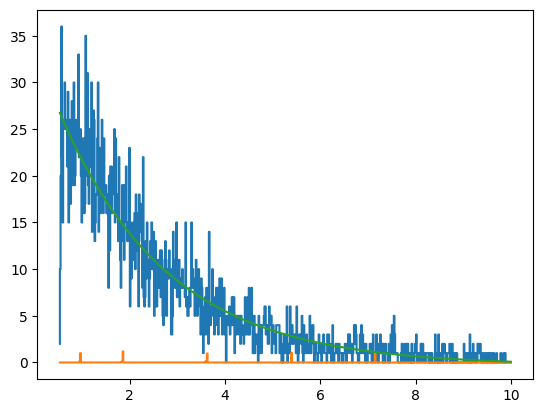

In [154]:
xrange = np.linspace(0,10,730)[39:]
plt.step(xrange,hour36d['Data'][39:730])
plt.step(xrange,caldata['Data'][39:730]/3000)
plt.plot(xrange,mounmodel(xrange,*p))
#plt.plot(xrange,mounmodel(xrange,2.19))

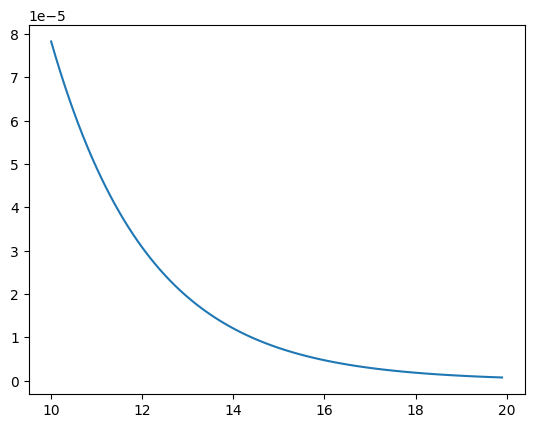

In [62]:
brange=np.arange(10,20,.1)
plt.plot(brange,mounmodel(brange,*p))

In [63]:
1/2.19

0.4566210045662101